# Installation

In [1]:
!pip install plotly
!pip install cufflinks

# PLOTLY

## Plotly is a free and open-source Python library for creating interactive visualizations. It works seamlessly with pandas, enabling users to generate plots directly from DataFrame and Series objects for efficient data analysis.

## Importing Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
%matplotlib inline

## Enabling plotly for offline mode in Jupyter

In [11]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

## Exploratory Data Analysis (EDA) is an essential first step before diving into any visualization or modeling with Plotly or other libraries.

## EDA before using Plotly.

## Importing a Dataset

In [82]:
df = pd.read_csv("C:/Users/Brahmesh/Downloads/extended_olympics_dataset.csv") #imports a dataset

## Basic Info

In [79]:
df.head() #displays first 5 rows of the data frame

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [84]:
df.tail() #displays the last 5 rows of the data frame

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
199995,165654,Lisa Cortez,F,32.0,211.0,103.0,Kurush IV,GHA,1912 Summer,1943,Winter,Salt Lake City,Curling,Rugby Men's Rugby,Gold
199996,165655,Matthew Khan,F,24.0,143.0,115.0,Encore,UAE,1980 Winter,1910,Winter,Antwerpen,Volleyball,Figure Skating Mixed Pairs,Bronze
199997,165656,William Douglas,M,36.0,155.0,125.0,United States-7,DJI,2014 Winter,2014,Winter,Amsterdam,Military Ski Patrol,Rhythmic Gymnastics Women's Group,Gold
199998,165657,Antonio Ellison,M,15.0,162.0,60.0,Ylliam II,CRT,1956 Winter,1931,Summer,Barcelona,Judo,Cycling Men's 2 mile,Gold
199999,165658,Anthony Snyder,F,17.0,164.0,107.0,South Vietnam,IND,1976 Summer,1903,Winter,Montreal,Weightlifting,Rowing Men's Coxed Pairs,Bronze


In [90]:
df.shape #displays the size of the data frame

(200000, 15)

In [92]:
df.info() #provides an overview of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      200000 non-null  int64  
 1   Name    200000 non-null  object 
 2   Sex     200000 non-null  object 
 3   Age     197268 non-null  float64
 4   Height  183746 non-null  float64
 5   Weight  182899 non-null  float64
 6   Team    200000 non-null  object 
 7   NOC     200000 non-null  object 
 8   Games   200000 non-null  object 
 9   Year    200000 non-null  int64  
 10  Season  200000 non-null  object 
 11  City    200000 non-null  object 
 12  Sport   200000 non-null  object 
 13  Event   200000 non-null  object 
 14  Medal   107044 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 22.9+ MB


In [94]:
df.describe() #displays summary statistics for numerical columns in our DataFrame.

,ID,Age,Height,Weight,Year
count,200000.000000,197268.000000,183746.00000,182899.000000,200000.000000
mean,71756.671445,28.188971,178.32029,82.408873,1966.254215
std,50033.968027,8.190363,20.34309,23.266757,35.909714
min,1.000000,11.000000,127.00000,25.000000,1896.000000
25%,25745.000000,22.000000,164.00000,64.000000,1936.000000
50%,65658.500000,27.000000,177.00000,79.000000,1971.000000
75%,115658.250000,34.000000,193.00000,101.000000,1997.000000
max,165658.000000,88.000000,223.00000,214.000000,2024.000000


## It is better to remove all the duplicates before getting into the analysis part

In [99]:
df.drop_duplicates(['ID'],keep = 'first', inplace = True)

In [101]:
df.shape

(165658, 15)

## Duplicates are removed and good enough to perform analysis on the data

## Now dealing with the missing values

In [105]:
df.isnull().sum() #display the count of null values present in each column

ID            0
Name          0
Sex           0
Age        1887
Height     9453
Weight     9747
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     63548
dtype: int64

## No columns has more than 75% null values so let's try to figure out the significance.

### 1. Age - It is significant feature for age distribution purpose
### 2. Name - It is not much important but helpful for the information to know who won the medal
### 3. Medal - It is an important feature to know which gender or which countries have won more medals
### 4. Year - It is an important feature to know the yearly participation trend
### 5. Gender - Not much important feature but it gives an insight
### 6. Season, Event - These are unimportant features and can be ignored

In [111]:
df = df.dropna(subset=['Age', 'Height', 'Weight'])  # drop rows with missing key numerical data

In [113]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     54845
dtype: int64

## Value Counts (for Categorical data)

In [119]:
df['Sport'].value_counts() #display the total count for each sport category

Sport
Athletics           6914
Swimming            3707
Rowing              3203
Football            3142
Cycling             3035
                    ... 
Croquet             1981
Jeu De Paume        1961
Cricket             1958
Lacrosse            1931
Art Competitions    1909
Name: count, Length: 65, dtype: int64

In [123]:
df['Sex'].value_counts() #displays the value count for each gender

Sex
M    83194
F    72220
Name: count, dtype: int64

In [127]:
df['Medal'].value_counts() #displays value count for each category in medal

Medal
Silver    33572
Bronze    33504
Gold      33493
Name: count, dtype: int64

## Distribution plots

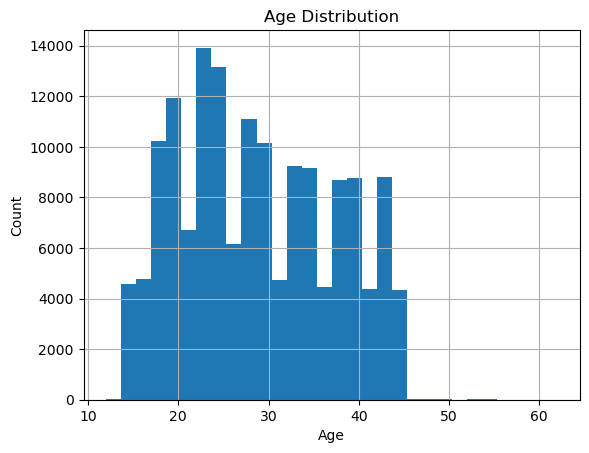

In [130]:
df['Age'].hist(bins=30); plt.title("Age Distribution"); 
plt.xlabel("Age"); 
plt.ylabel("Count"); 
plt.show()

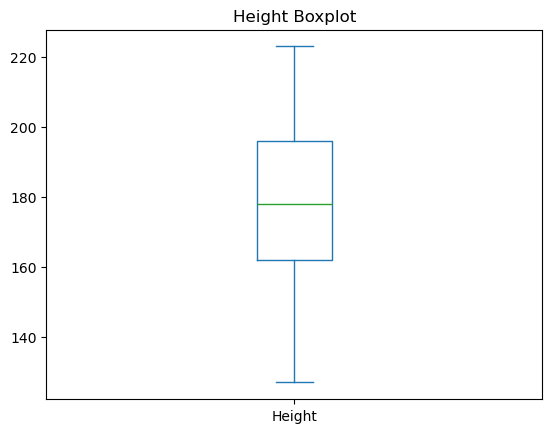

In [132]:
df['Height'].plot(kind='box'); 
plt.title("Height Boxplot"); 
plt.show()

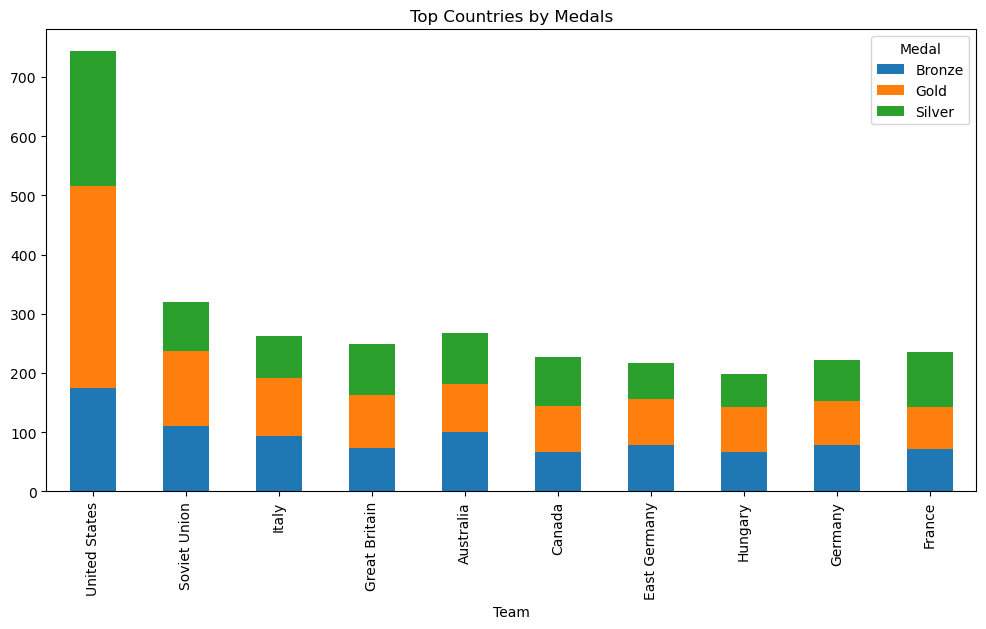

In [136]:
df.groupby('Team')['Medal'].value_counts().unstack().fillna(0).sort_values('Gold', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12,6)); 
plt.title("Top Countries by Medals"); 
plt.show()

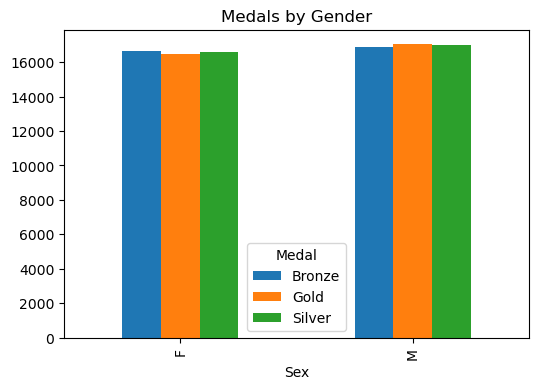

In [138]:
pd.crosstab(df['Sex'], df['Medal']).plot(kind='bar', figsize=(6,4)); 
plt.title("Medals by Gender"); 
plt.show()

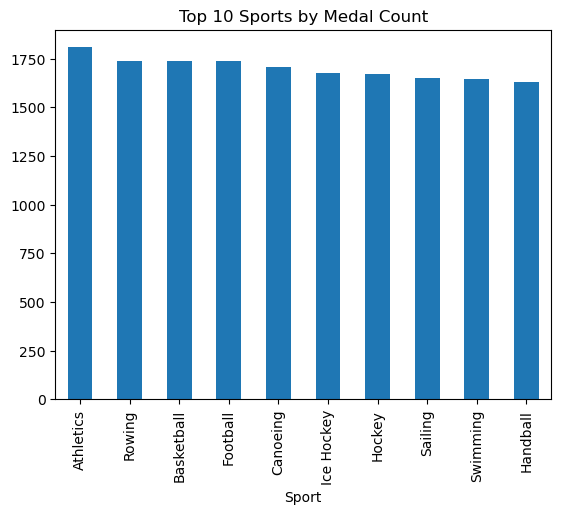

In [140]:
df[df['Medal'].notnull()]['Sport'].value_counts().head(10).plot(kind='bar'); 
plt.title("Top 10 Sports by Medal Count"); 
plt.show()

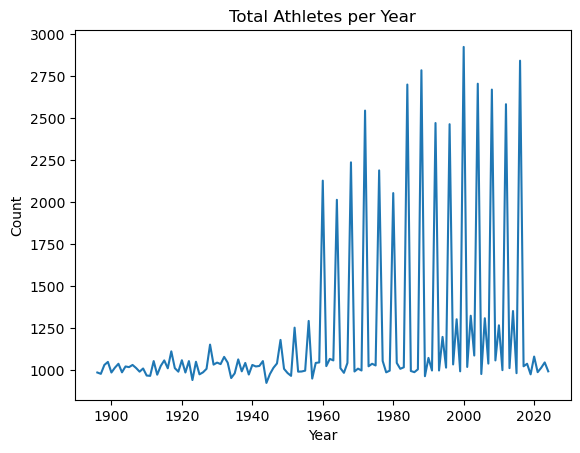

In [142]:
df.groupby('Year').size().plot(kind='line'); 
plt.title("Total Athletes per Year"); 
plt.xlabel("Year"); 
plt.ylabel("Count"); 
plt.show()

In [144]:
df[df['Medal'].notnull()]['Name'].value_counts().head(10) #top medal winning atheletes

Name
Michael Smith          44
Michael Johnson        37
Christopher Johnson    33
David Smith            33
John Johnson           32
John Smith             30
Christopher Smith      30
James Smith            30
Jennifer Johnson       30
Robert Johnson         29
Name: count, dtype: int64

## 🧠 Conclusions / Key Insights
Age Distribution skews younger, most athletes are in their 20s.

Height and Weight have natural sport-based variations and outliers.

USA, Russia, and Germany dominate medal tables.

Men win slightly more medals than women (but this varies by sport).

Most medals come from Swimming, Athletics, and Gymnastics.

Participation has steadily increased over the years.

Some athletes have earned multiple medals, indicating repeat Olympic success.

 ##